# INTRO
Tools for Gareth to figure out how many meshed to make.

In [1]:
from importlib import reload  
import Mesher

In [26]:
Mesher = reload(Mesher)

# GENERATE A HEXAGONAL MESH
To make the mesh I am working in hexagonal co-ordinate system. This is somewhat like a 3D orthogonal grid, but not quite. In its bones there are three axces. Long story short the center element is a co-ordinate [0, 0, 0]. The plot shows each element as a patch with the element number overlay. 

The mesh itself is just a dictionary with the following format {element ID : element centroid co-ordinates [x, y, z]}

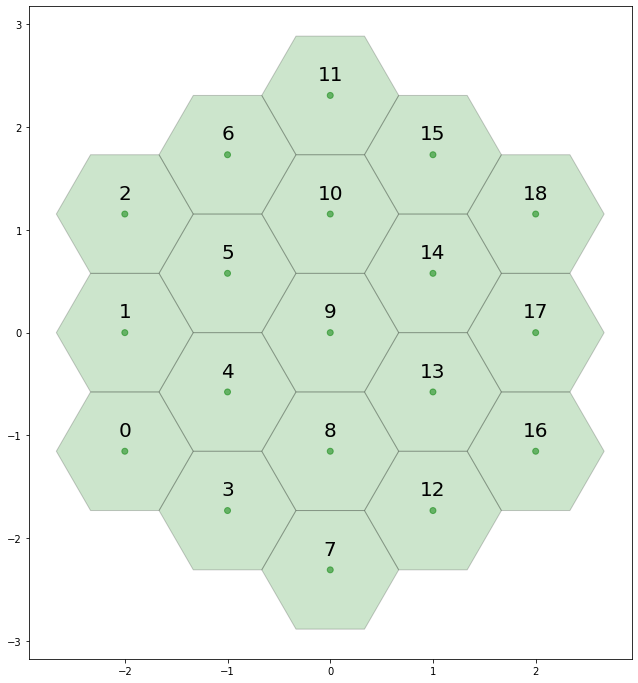

In [3]:
Number_of_rings = 2

myMesh = Mesher.make_hex_grid(Number_of_rings)
Mesher.plot_hex(myMesh)

# GENERATE A MESH GRAPH
An undirected graph makes many of the later processes easier so I conver the mesh dictionary to a graph.

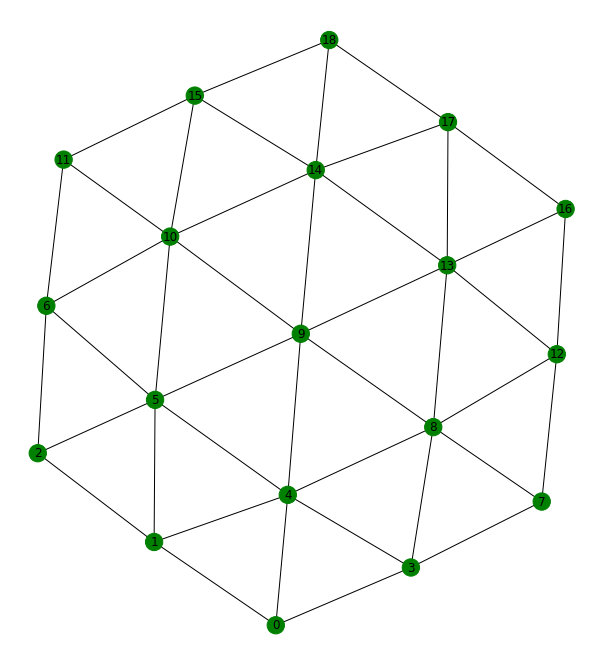

In [4]:
mesh_graph = Mesher.make_hex_network(myMesh)
Mesher.plot_network(mesh_graph)

# GENERATE AN ACTIVE SUBSET
Generate a subset of the full mesh indicating the placement of a runner.

## Random Active Subset
Draws 'n' elements from the full mesh for an active subset. This set can be plotted in either the mesh or network format

Mesh with active subset


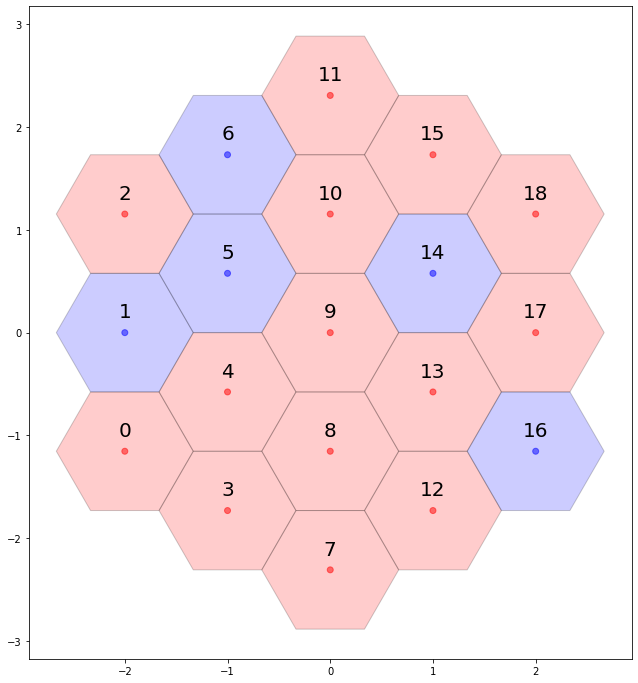

Graph with active subset


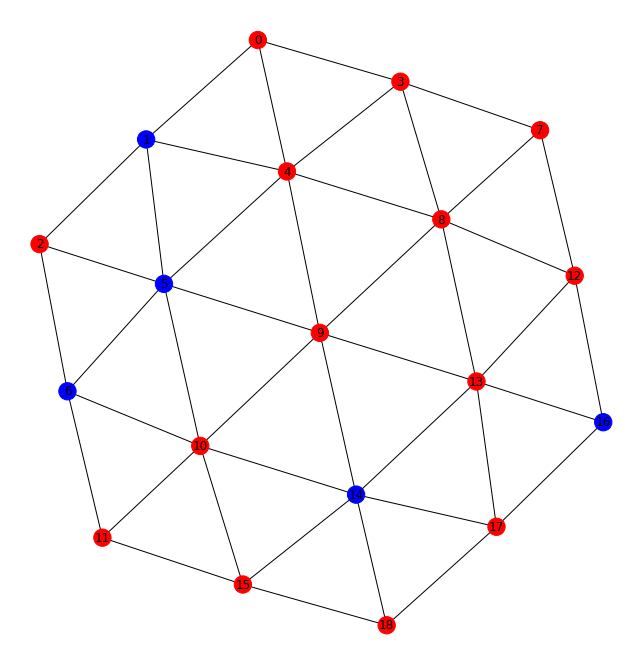

In [5]:
number_of_active_cells = 5

active_random_n = Mesher.active_subset_random(
    mesh_graph,
    number_of_active_cells
)

print("Mesh with active subset")
Mesher.plot_hex(
    myMesh,
    active=active_random_n
)

print("Graph with active subset")
Mesher.plot_network(
    mesh_graph,
    active=active_random_n
)

## Random Markov subset
This subset can still be defined by the subset size, but I make some assumptions 
* All active subsets start at the centermost element
* One element is randomly added at a time
* Only adjacent elements are considered, resulting in a connected selection of elements
* Elements already in the active set are not considered.

Mesh with active subset


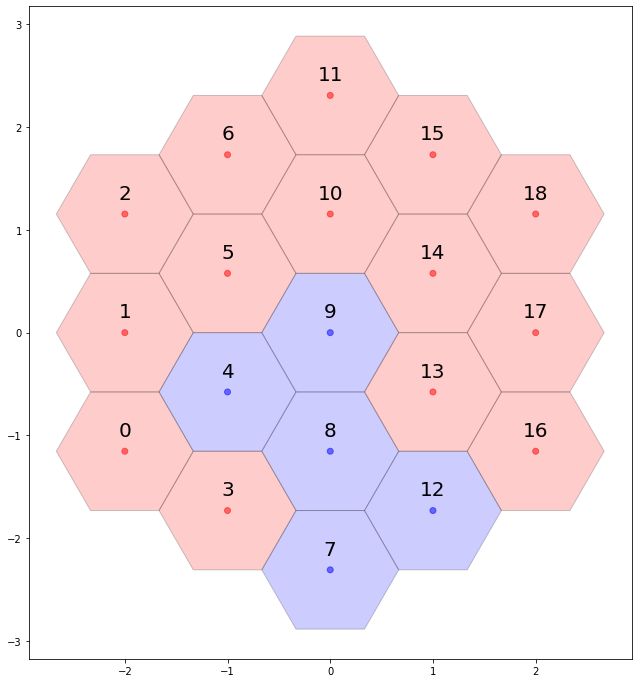

Graph with active subset


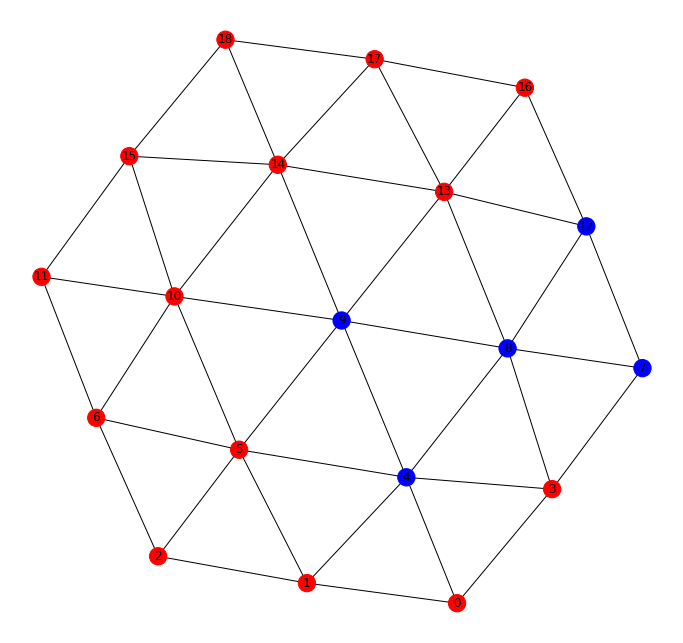

In [6]:
active_random_markov = Mesher.active_subset_markov_random(
    mesh_graph,
    starting_node=None,
    depth=number_of_active_cells
)

print("Mesh with active subset")
Mesher.plot_hex(myMesh, active=active_random_markov)
print("Graph with active subset")
Mesher.plot_network(mesh_graph, active=active_random_markov)

## Show Only the Active Subnetwork
Using graph theory you can extract only the parts of the full mesh associated with the active set. This can be done for the random and markov subsets

Random active sub graph


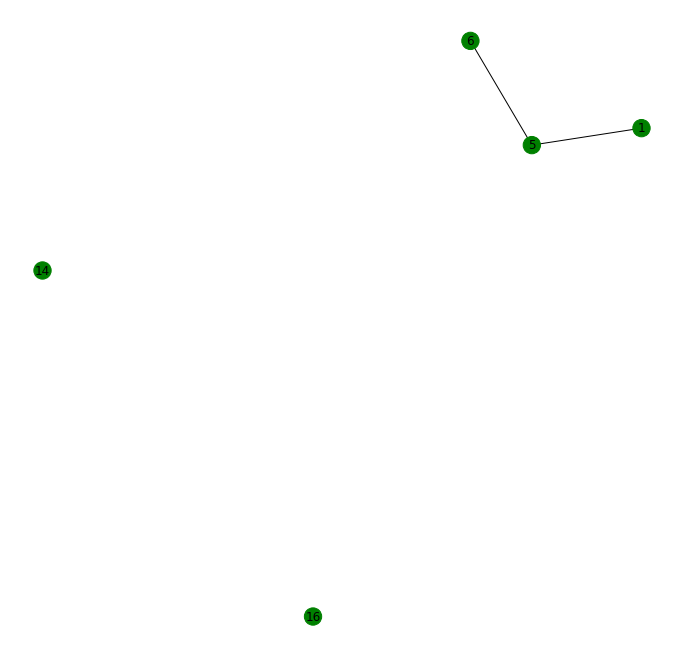

Markov active sub graph


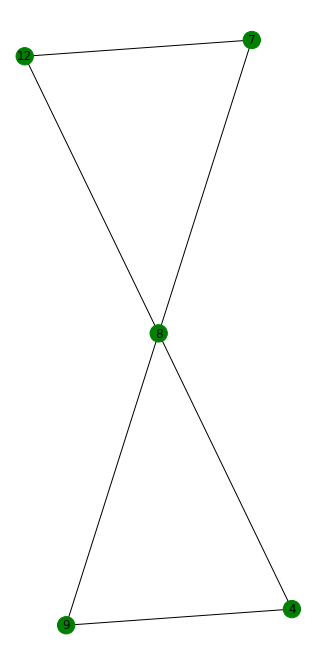

In [7]:
print("Random active sub graph")
random_subnet = Mesher.get_active_sub_network(
    mesh_graph, 
    active=active_random_n
)
Mesher.plot_network(random_subnet)

print("Markov active sub graph")
markov_subnet = Mesher.get_active_sub_network(
    mesh_graph, 
    active=active_random_markov
)
Mesher.plot_network(markov_subnet)

# TESTS
You may wnat to do some testing so here are the tools

## Fully Connected Active Set
This test looks at only the active set and determinse whether it if fully connected. The randoms sets often have gaps, but the Markov set never does.

In [8]:
print("Random Active?", Mesher.test_network_connectivity(random_subnet))
print("Markov Active?", Mesher.test_network_connectivity(markov_subnet))

Random Active? False
Markov Active? True


## Isomorphs
This test determins whether two active subsets have the same nuber of elements, with the same adjacency pattern. Essentially from a graph point of view the subsets have the same structure. The active sets are not quite geometrically Identical. 

In [9]:
print("Random Active and Random Active?", Mesher.test_network_isomorphs(random_subnet, random_subnet))
print("Markov Active and Markov Active?", Mesher.test_network_isomorphs(markov_subnet, markov_subnet))
print("Random Active and Markov Active?", Mesher.test_network_isomorphs(random_subnet, markov_subnet))

Random Active and Random Active? True
Markov Active and Markov Active? True
Random Active and Markov Active? False


# FIND ISOMORPHS (MONTE CARLO)
Generates a large nuber of random Markov active sets and determines which subsets are isomorphs. This returns a dictionary identifying the isomprph and listing the known subsets{isomprph ID, [[subset],[subset]}

This problem boils down to a from M choose N style problem.

## Find Isomprphs at Depth N
Find the isomrphs at depth N

In [35]:
depth = 4
runs = 100
isomorohs_at_n = Mesher.find_all_isomorphs(
    mesh_graph, 
    depth=depth, 
    runs=runs)

unique_active = 0
for _, morph_list in isomorohs_at_n.items():
    unique_active += len(morph_list)

print("Found {} Isomprphs at Depth {} after {} runs, {} unique".format(len(isomorohs_at_n), depth, runs, unique_active))

Found 3 Isomprphs at Depth 4 after 100 runs, 44 unique


### Comparison Between Isomorphs

Isomorph 0 representative plot


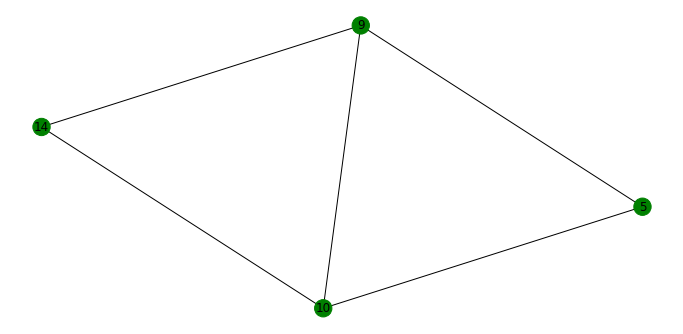

Isomorph 1 representative plot


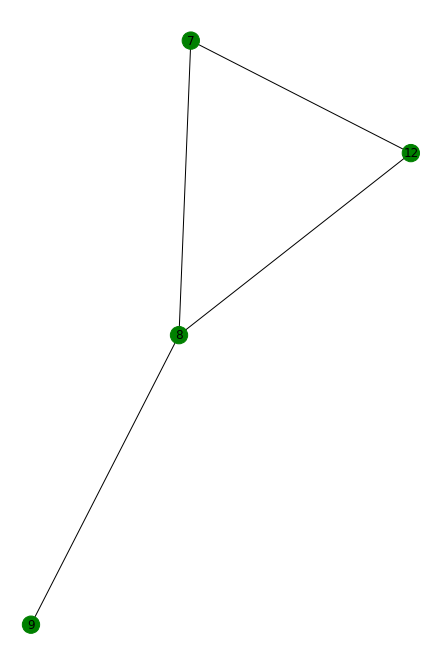

Isomorph 2 representative plot


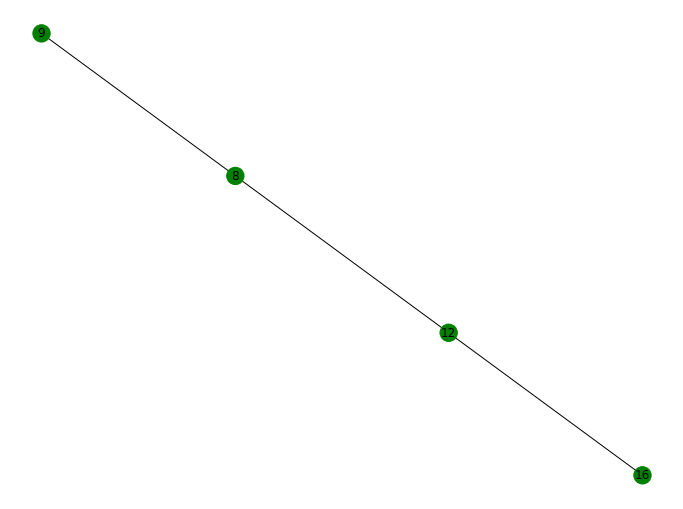

In [36]:
for iso_id, isolist in isomorohs_at_n.items():
    print("Isomorph {} representative plot".format(iso_id))
    subnet = Mesher.get_active_sub_network(mesh_graph, active=isolist[0])
    Mesher.plot_network(subnet)

Isomorph 0 representative plot


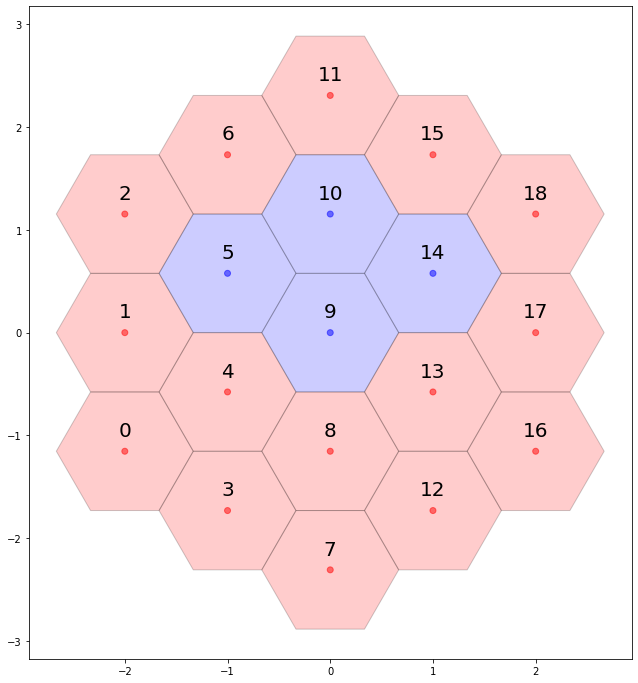

Isomorph 1 representative plot


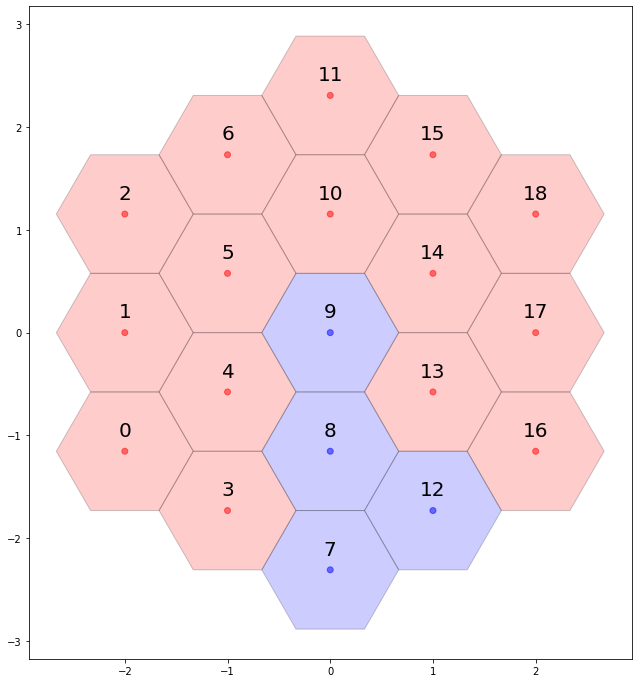

Isomorph 2 representative plot


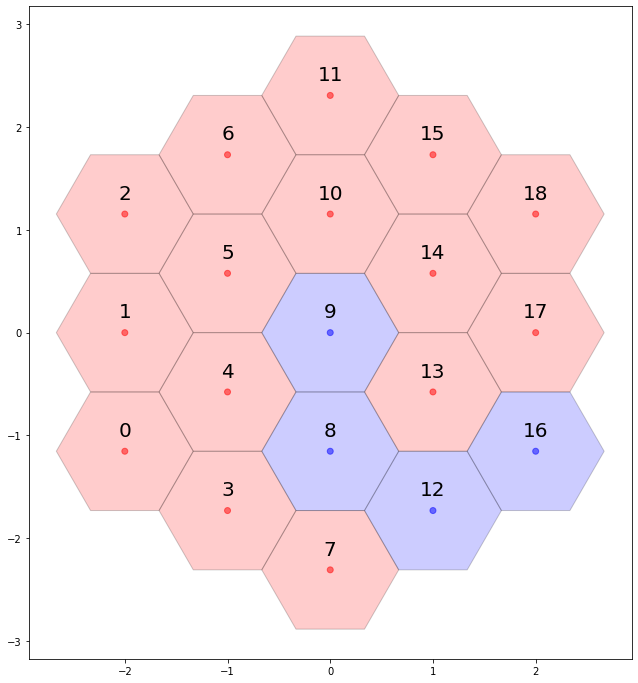

In [37]:
for iso_id, isolist in isomorohs_at_n.items():
    print("Isomorph {} representative plot".format(iso_id))
    subnet = Mesher.get_active_sub_network(mesh_graph, active=isolist[0])
    Mesher.plot_hex(myMesh, active=isolist[0])

### Comparison Within Isomorphs

Morph [9, 14, 10, 5] 


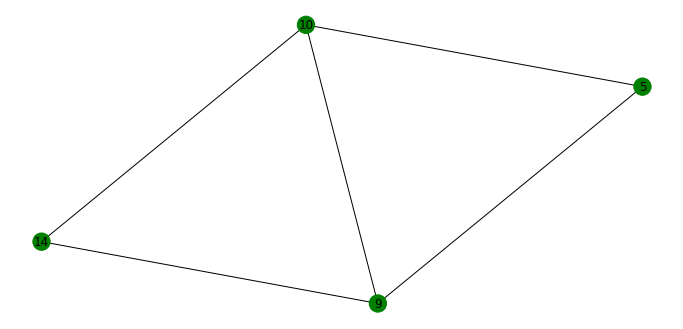

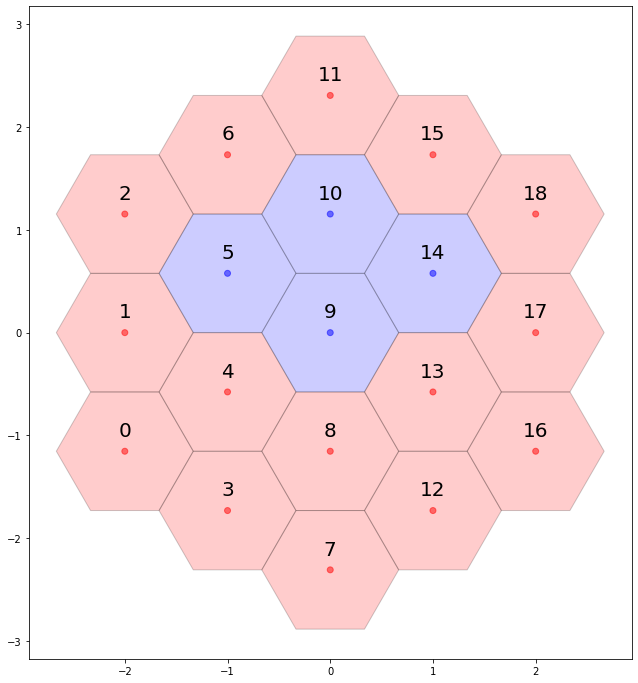

Morph [9, 4, 5, 10] 


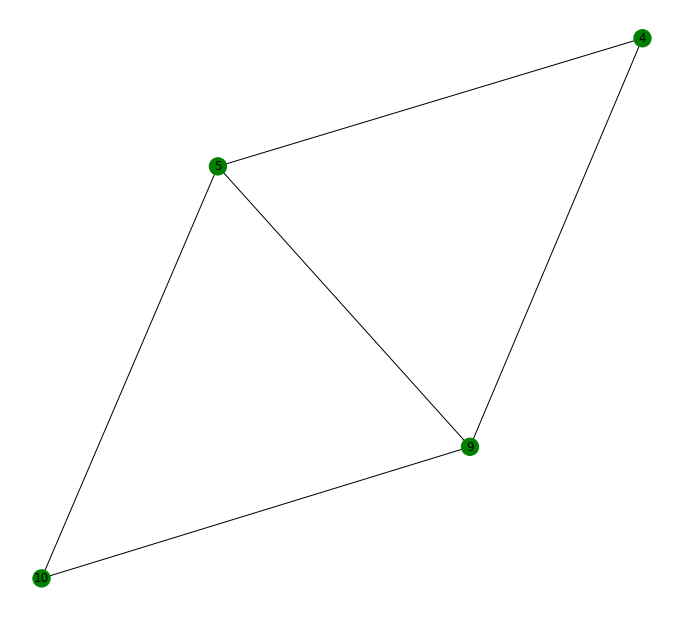

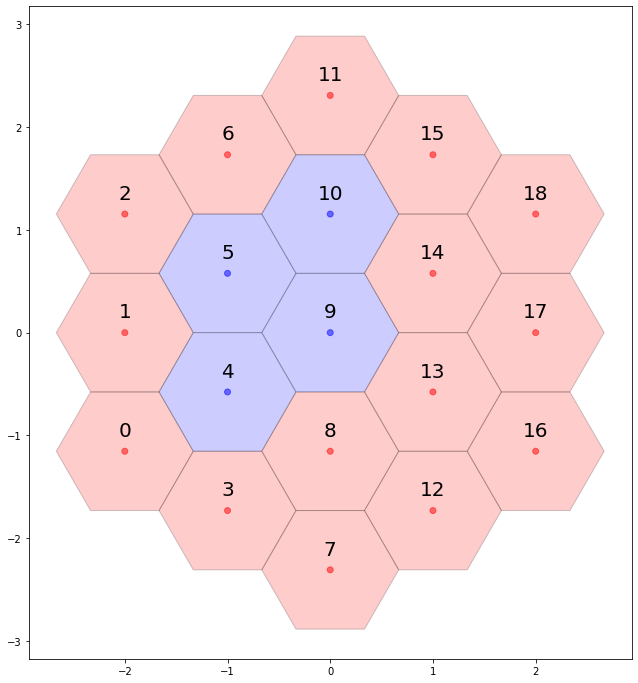

Morph [9, 5, 6, 10] 


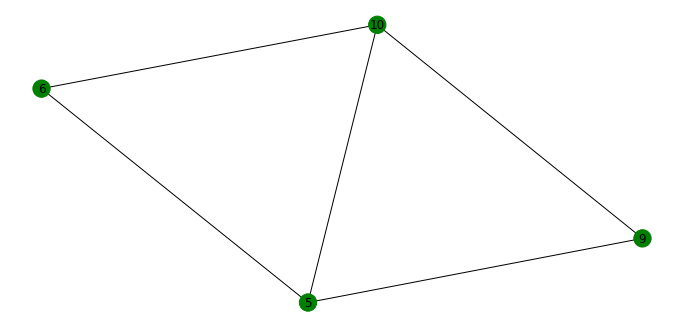

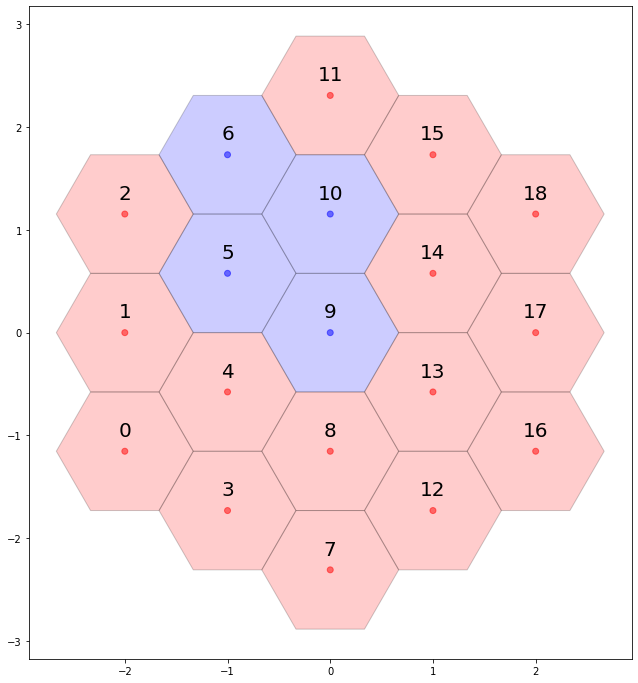

Morph [9, 13, 17, 14] 


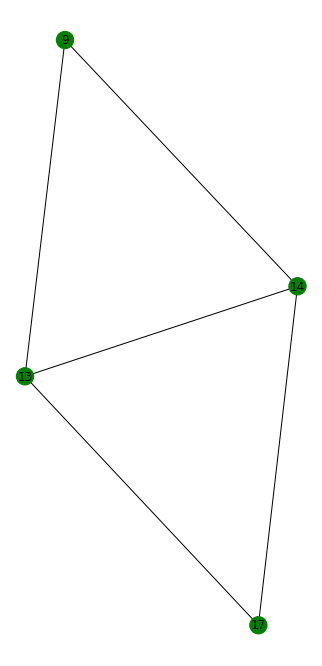

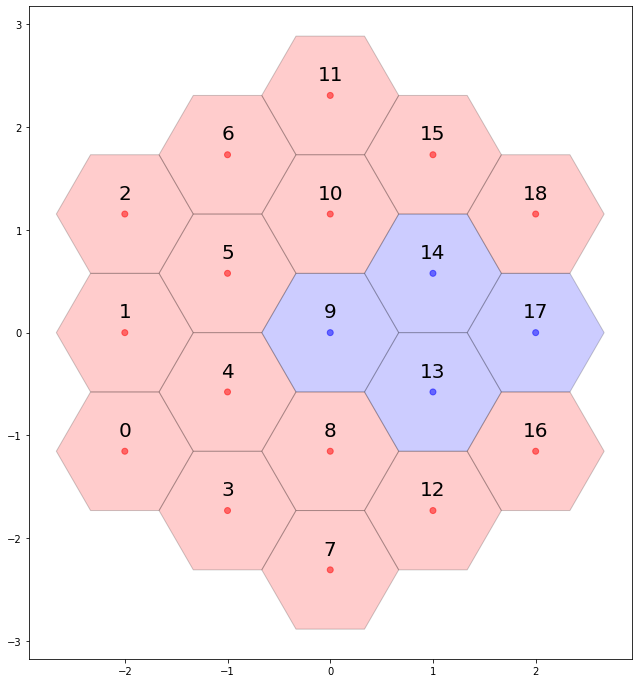

Morph [9, 10, 14, 15] 


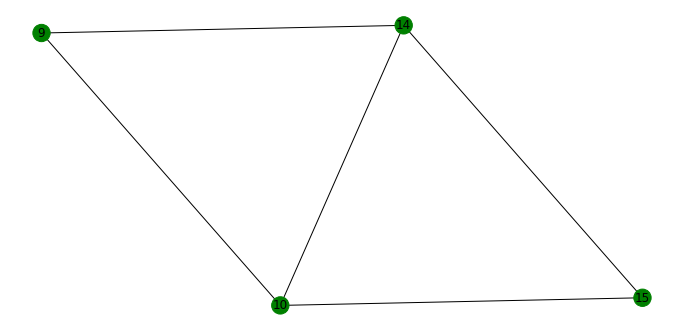

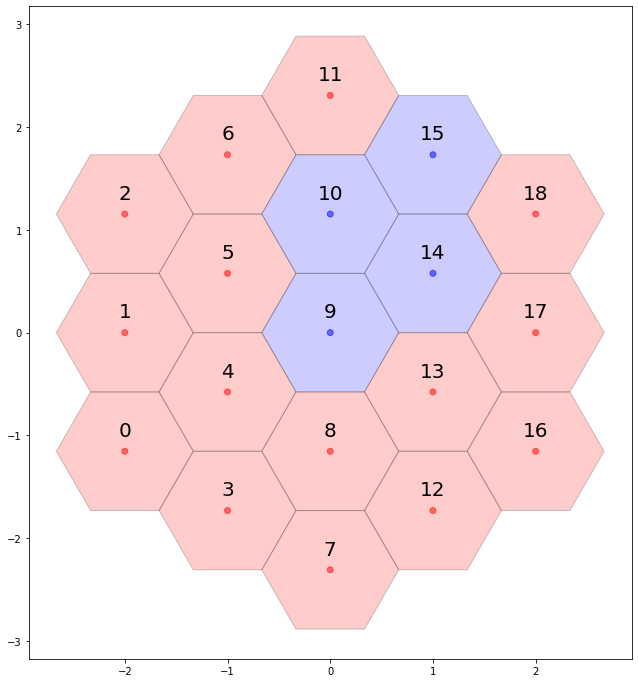

Morph [9, 4, 8, 3] 


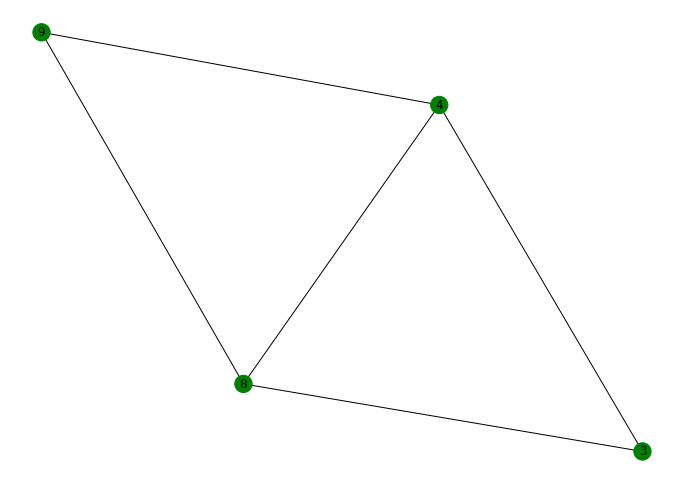

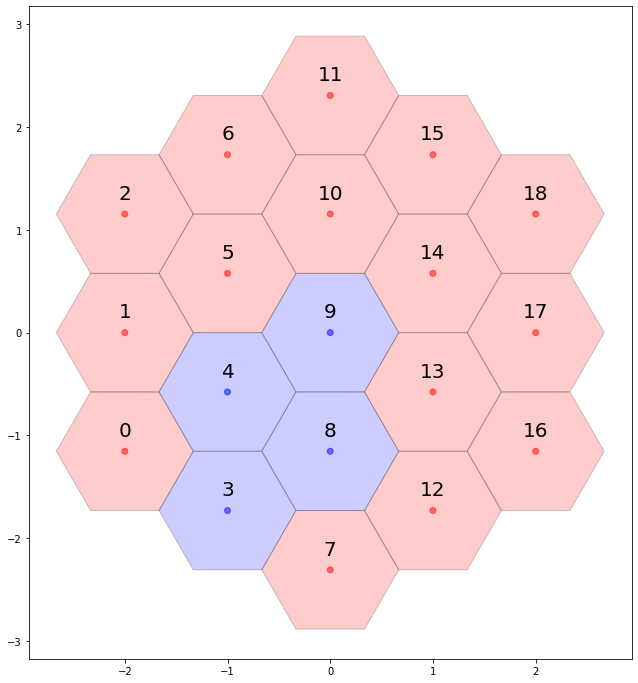

Morph [9, 4, 8, 13] 


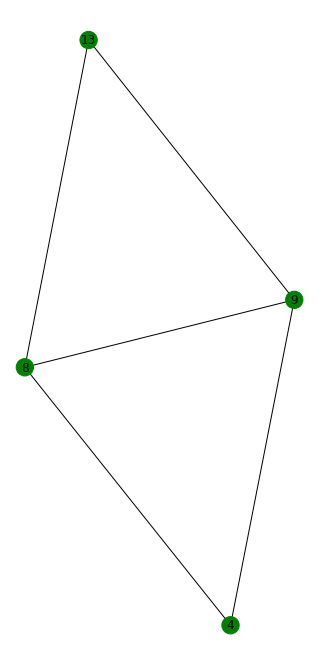

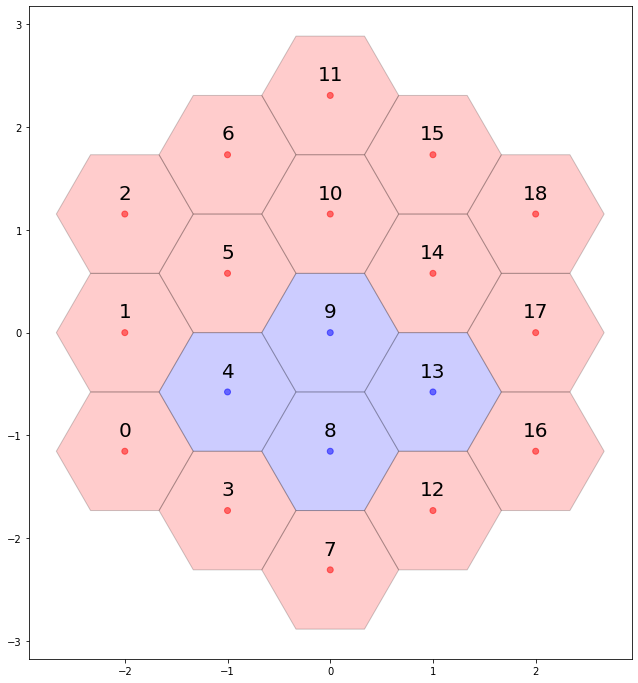

Morph [9, 13, 14, 10] 


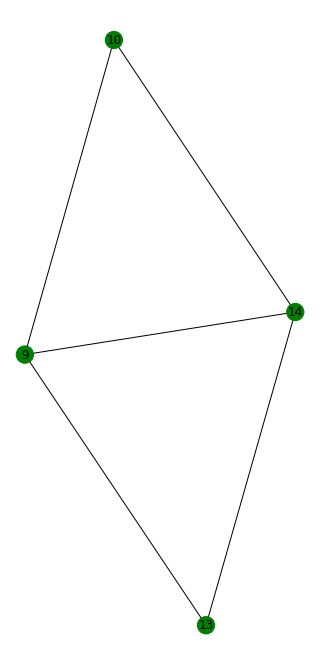

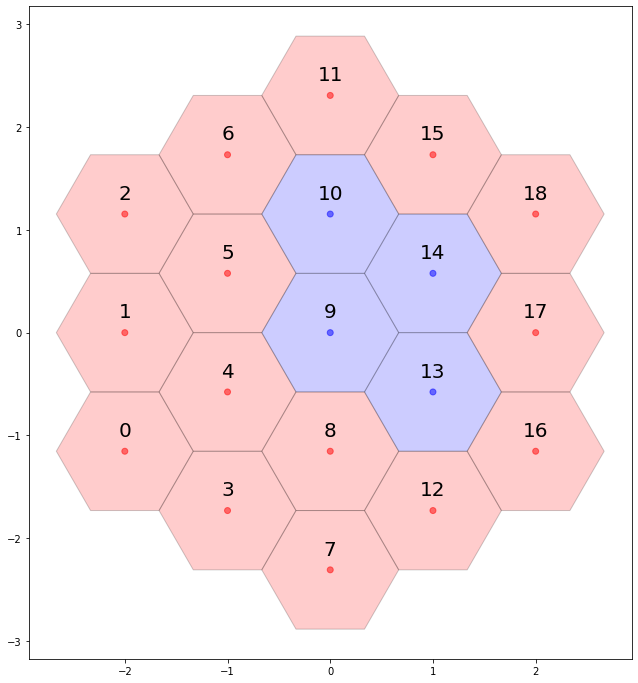

Morph [9, 5, 4, 1] 


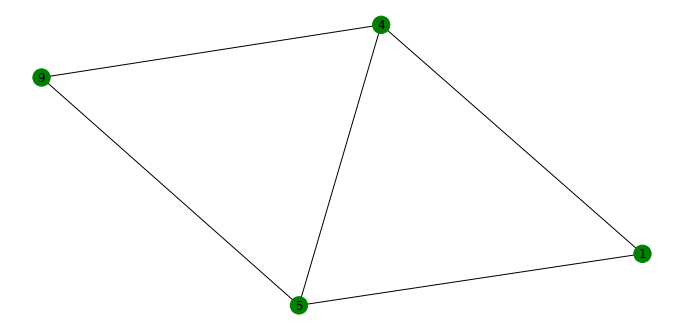

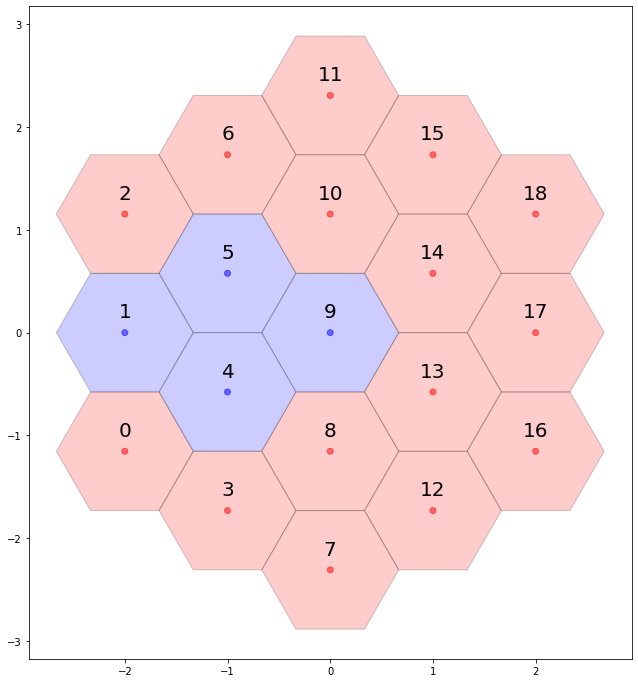

Morph [9, 8, 13, 14] 


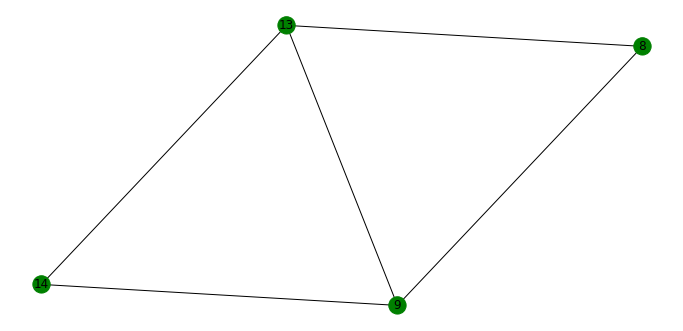

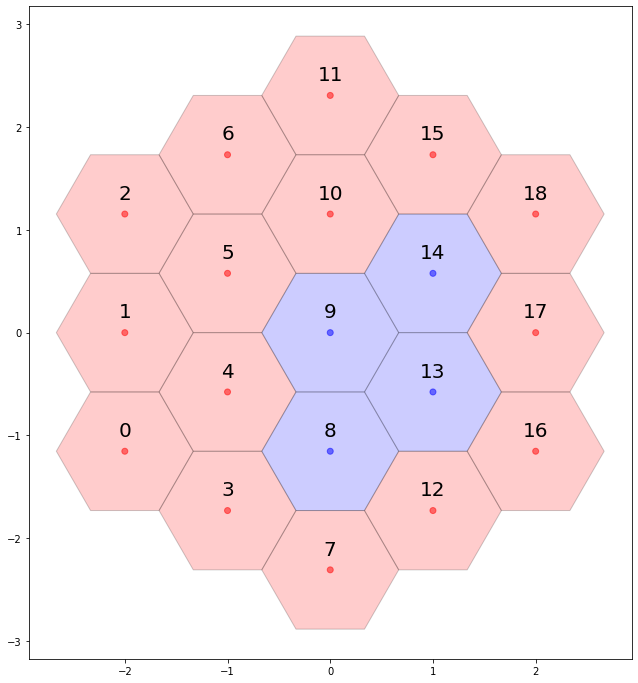

Morph [9, 13, 12, 8] 


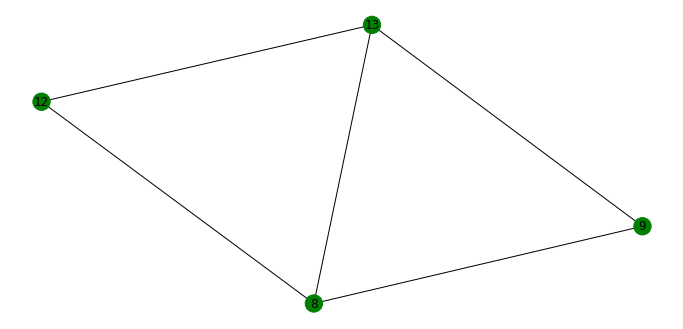

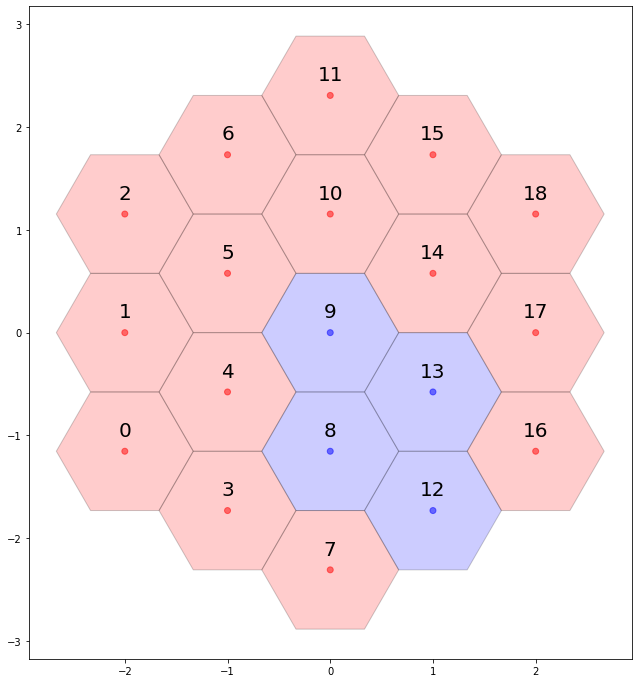

In [39]:
for morph in isomorohs_at_n[0]:
    print("Morph {} ".format(morph))
    subnet = Mesher.get_active_sub_network(mesh_graph, active=morph)
    Mesher.plot_network(subnet)
    Mesher.plot_hex(myMesh, active=morph)